In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
testfile = 'data_set_ALL_AML_independent.csv'
trainfile = 'data_set_ALL_AML_train.csv'
labels = 'actual.csv'

X_train_original = pd.read_csv(trainfile)
X_test_original = pd.read_csv(testfile)
y_original = pd.read_csv(labels)

train_keepers = [col for col in X_train_original.columns if "call" not in col]
test_keepers = [col for col in X_test_original.columns if "call" not in col]

X_train_clean = X_train_original[train_keepers]
X_test_clean = X_test_original[test_keepers]

X_train_T = X_train_clean.T
X_test_T = X_test_clean.T


X_train_T.columns = X_train_T.iloc[1]
X_train_T = X_train_T.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

X_test_T.columns = X_test_T.iloc[1]
X_test_T = X_test_T.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

X_train_T.index = pd.to_numeric(X_train_T.index)
X_test_T.index = pd.to_numeric(X_test_T.index)

X_train = X_train_T.sort_index()
y_train = y_original[y_original.patient <= 38]

X_test = X_test_T.sort_index()
y_test = y_original[y_original.patient > 38]

display(X_train)
display(X_test)

display(y_train)
display(y_test)

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
46,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
5,6,ALL
6,7,ALL
7,8,ALL
8,9,ALL
9,10,ALL


,patient,cancer
38,39,ALL
39,40,ALL
40,41,ALL
41,42,ALL
42,43,ALL
43,44,ALL
44,45,ALL
45,46,ALL
46,47,ALL
47,48,ALL


In [3]:
X_combine = pd.concat([X_train, X_test])
y_combine = pd.concat([y_train, y_test])

display(X_combine)
display(y_combine)

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
5,6,ALL
6,7,ALL
7,8,ALL
8,9,ALL
9,10,ALL


In [4]:
X_std = StandardScaler().fit_transform(X_combine)

pca = PCA()
X_reduced = pca.fit_transform(X_std)
X_reduced.shape

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(72, 72)

In [5]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum

array([0.14921586, 0.24367759, 0.2903799 , 0.33073399, 0.36501382,
       0.3968978 , 0.42396777, 0.44816665, 0.47027425, 0.4917734 ,
       0.51052901, 0.52874358, 0.54549895, 0.56115074, 0.57654594,
       0.59084979, 0.60449647, 0.6171056 , 0.62956134, 0.64134232,
       0.65303867, 0.66439326, 0.67524388, 0.68591518, 0.69638778,
       0.70679992, 0.71652888, 0.72615522, 0.73565364, 0.74478907,
       0.75381107, 0.76268995, 0.77152299, 0.78002917, 0.78841142,
       0.79652955, 0.80447701, 0.81240954, 0.82025188, 0.82779406,
       0.83521306, 0.84250644, 0.84974792, 0.85677589, 0.86372842,
       0.87060902, 0.87740601, 0.88416939, 0.89074132, 0.89723396,
       0.90345962, 0.90952727, 0.91553763, 0.92134188, 0.92710658,
       0.93281083, 0.93831622, 0.94380183, 0.94904137, 0.95421596,
       0.95913437, 0.96398326, 0.96852095, 0.97281423, 0.97707446,
       0.98123409, 0.98533344, 0.98931659, 0.99303807, 0.99662361,
       1.        , 1.        ])

In [6]:
y_labels = y_combine.replace({'ALL':0, 'AML':1})
y_labels

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


Text(0.5, 0.9, 'First Three PCA Visualization')

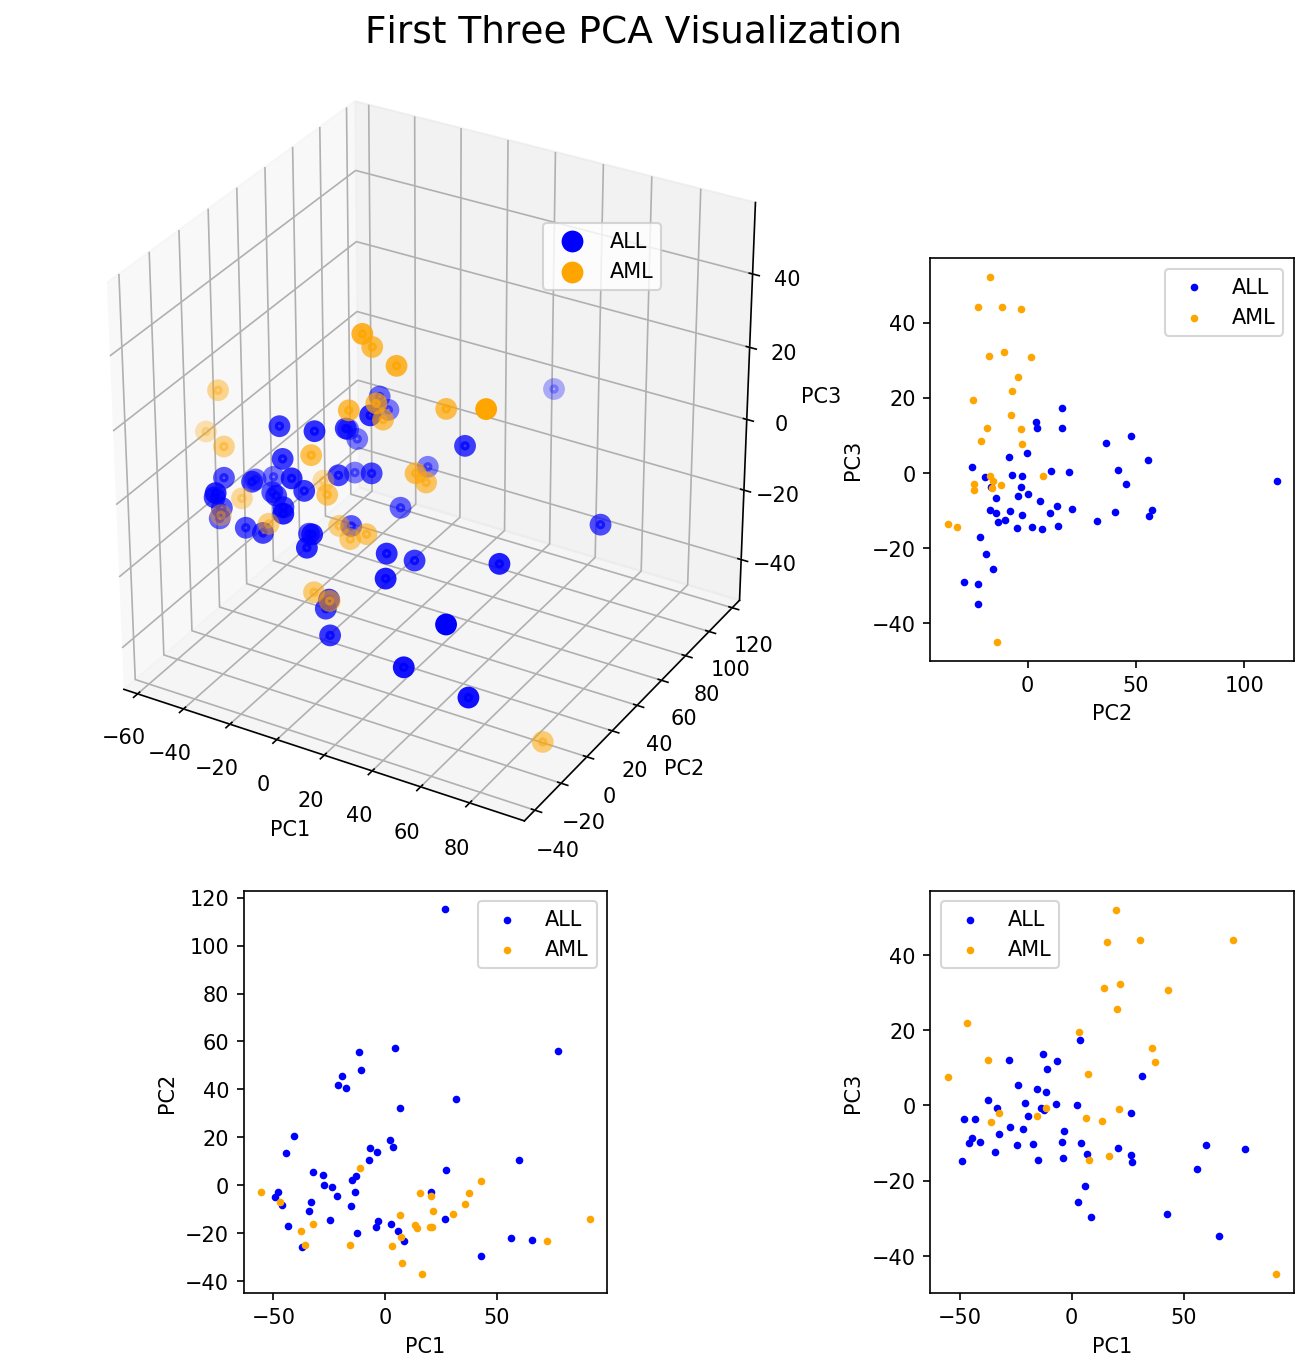

In [7]:
fig = plt.figure(dpi=150, figsize=(11,11))
grid = plt.GridSpec(6, 6, hspace=0.1, wspace=0.7)
ax1 = fig.add_subplot(grid[:4, :4], projection='3d')
ax1.scatter(X_reduced[y_labels['cancer']==0][:,0], X_reduced[y_labels['cancer']==0][:,1], X_reduced[y_labels['cancer']==0][:,2], c='b', linewidths=6, label='ALL')
ax1.scatter(X_reduced[y_labels['cancer']==1][:,0], X_reduced[y_labels['cancer']==1][:,1], X_reduced[y_labels['cancer']==1][:,2], c='orange', linewidths=6, label='AML')
ax1.legend(bbox_to_anchor=(0.8, 0.8))
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax2 = fig.add_subplot(grid[4:, 1:3])
ax2.scatter(X_reduced[y_labels['cancer']==0][:,0], X_reduced[y_labels['cancer']==0][:,1], c='b', s=7, label='ALL')
ax2.scatter(X_reduced[y_labels['cancer']==1][:,0], X_reduced[y_labels['cancer']==1][:,1], c='orange', s=7, label='AML')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.legend()
ax3 = fig.add_subplot(grid[1:3, 4:])
ax3.scatter(X_reduced[y_labels['cancer']==0][:,1], X_reduced[y_labels['cancer']==0][:,2], c='b', s=7, label='ALL')
ax3.scatter(X_reduced[y_labels['cancer']==1][:,1], X_reduced[y_labels['cancer']==1][:,2], c='orange', s=7, label='AML')
ax3.set_xlabel("PC2")
ax3.set_ylabel("PC3")
ax3.legend()
ax4 = fig.add_subplot(grid[4:, 4:])
ax4.scatter(X_reduced[y_labels['cancer']==0][:,0], X_reduced[y_labels['cancer']==0][:,2], c='b', s=7, label='ALL')
ax4.scatter(X_reduced[y_labels['cancer']==1][:,0], X_reduced[y_labels['cancer']==1][:,2], c='orange', s=7, label='AML')
ax4.set_xlabel("PC1")
ax4.set_ylabel("PC3")
ax4.legend()
fig.suptitle("First Three PCA Visualization", y=0.9, fontsize=18)

In [8]:
X_tsne = TSNE(n_components=3).fit_transform(X_std)
X_tsne.shape

(72, 3)

Text(0.5, 0.9, 'T-SNE Visualization')

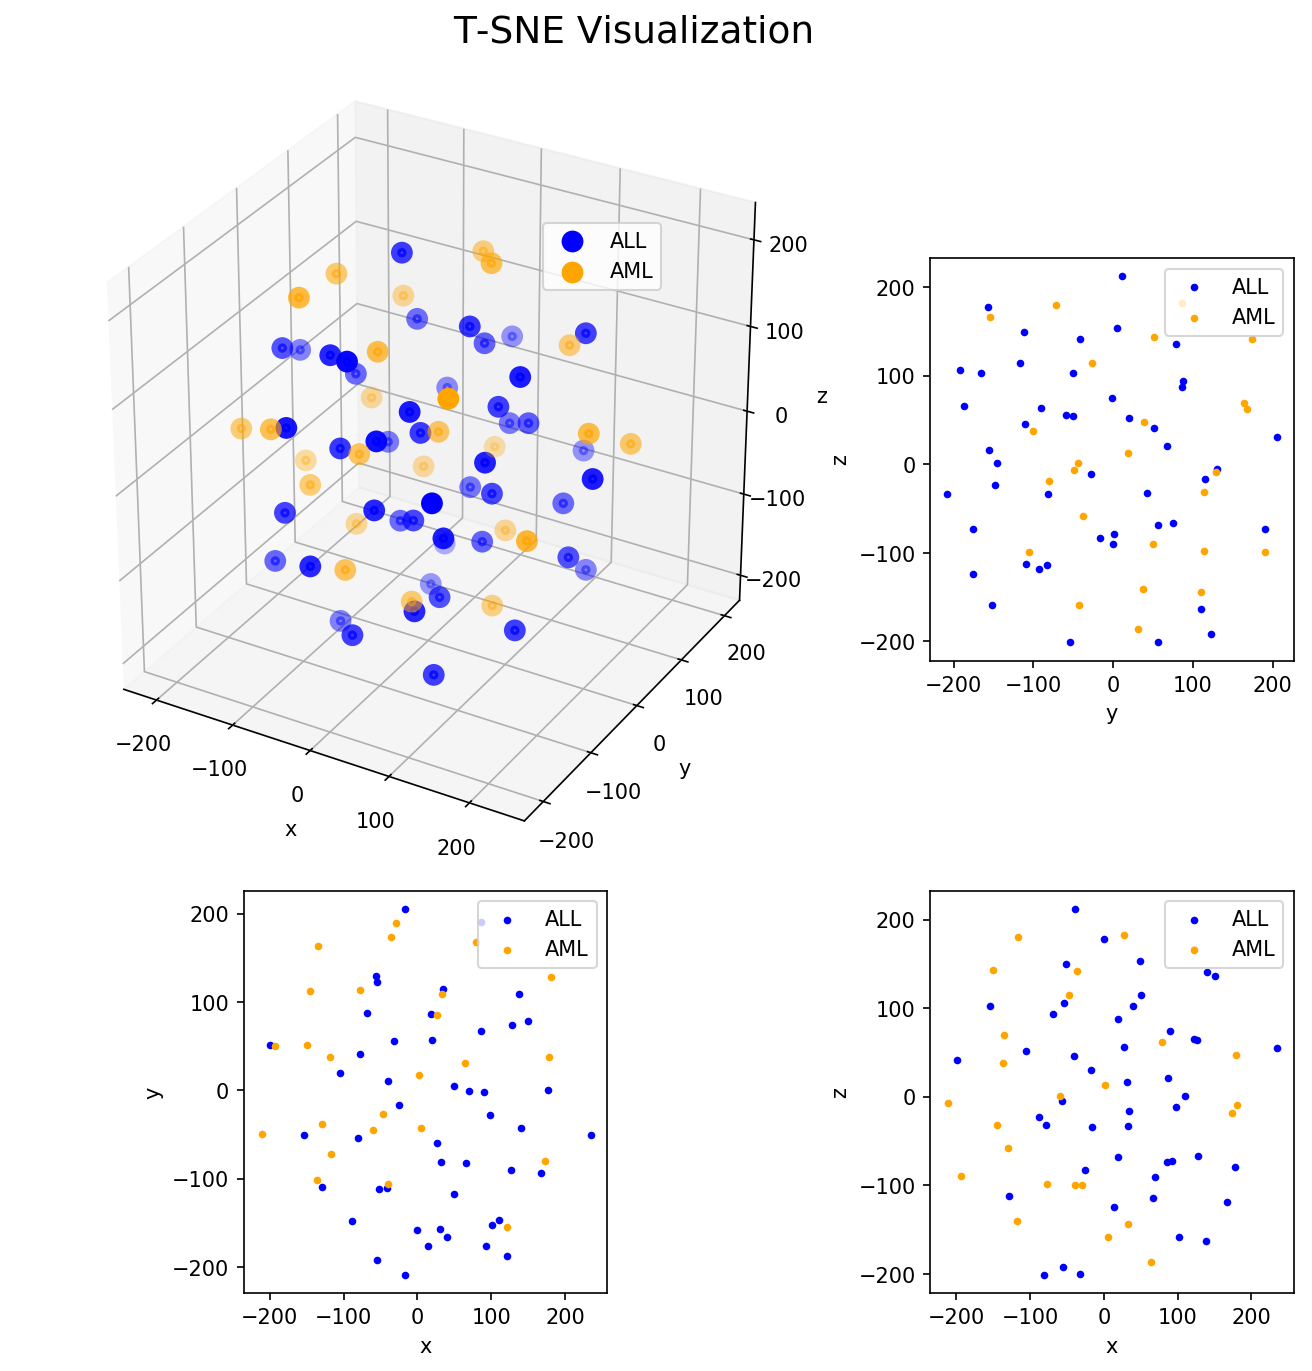

In [10]:
fig = plt.figure(dpi=150, figsize=(11,11))
grid = plt.GridSpec(6, 6, hspace=0.1, wspace=0.7)
ax1 = fig.add_subplot(grid[:4, :4], projection='3d')
ax1.scatter(X_tsne[y_labels['cancer']==0][:,0], X_tsne[y_labels['cancer']==0][:,1], X_tsne[y_labels['cancer']==0][:,2], c='b', linewidths=6, label='ALL')
ax1.scatter(X_tsne[y_labels['cancer']==1][:,0], X_tsne[y_labels['cancer']==1][:,1], X_tsne[y_labels['cancer']==1][:,2], c='orange', linewidths=6, label='AML')
ax1.legend(bbox_to_anchor=(0.8, 0.8))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax2 = fig.add_subplot(grid[4:, 1:3])
ax2.scatter(X_tsne[y_labels['cancer']==0][:,0], X_tsne[y_labels['cancer']==0][:,1], c='b', s=7, label='ALL')
ax2.scatter(X_tsne[y_labels['cancer']==1][:,0], X_tsne[y_labels['cancer']==1][:,1], c='orange', s=7, label='AML')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax3 = fig.add_subplot(grid[1:3, 4:])
ax3.scatter(X_tsne[y_labels['cancer']==0][:,1], X_tsne[y_labels['cancer']==0][:,2], c='b', s=7, label='ALL')
ax3.scatter(X_tsne[y_labels['cancer']==1][:,1], X_tsne[y_labels['cancer']==1][:,2], c='orange', s=7, label='AML')
ax3.set_xlabel("y")
ax3.set_ylabel("z")
ax3.legend()
ax4 = fig.add_subplot(grid[4:, 4:])
ax4.scatter(X_tsne[y_labels['cancer']==0][:,0], X_tsne[y_labels['cancer']==0][:,2], c='b', s=7, label='ALL')
ax4.scatter(X_tsne[y_labels['cancer']==1][:,0], X_tsne[y_labels['cancer']==1][:,2], c='orange', s=7, label='AML')
ax4.set_xlabel("x")
ax4.set_ylabel("z")
ax4.legend()
fig.suptitle("T-SNE Visualization", y=0.9, fontsize=18)